In [1]:
from hermes.analysis.exporter import SignalDataExporter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
raw_pixel_file_dir = "/PATH/TO/YOUR/DATA"  # Update this to your actual data directory
raw_pixel_file_name = "YOUR_RAW_SIGNAL_FILE_NAME.rawSignals"  # Update this to your actual raw signal file name
raw_pixel_file_path = f"{raw_pixel_file_dir}/{raw_pixel_file_name}"

In [3]:
# Read the raw signal file
exporter = SignalDataExporter()
df = exporter.read_raw_signals(raw_pixel_file_path)

In [4]:
# Display basic information about the loaded data
print(f"Successfully loaded {len(df):,} signal records")
print(f"Columns: {list(df.columns)}")
print(f"\nSignal type distribution:")
print(df['signalTypeDescription'].value_counts())
print(f"\nData time range: {df['ToaFinal'].min():.6f} to {df['ToaFinal'].max():.6f} seconds")
print(f"Duration: {df['ToaFinal'].max() - df['ToaFinal'].min():.6f} seconds")
print(f"\nPixel ranges: x({df['xPixel'].min()}-{df['xPixel'].max()}), y({df['yPixel'].min()}-{df['yPixel'].max()})")
print(f"\nFirst few rows:")
print(df.head(10))

Successfully loaded 19,444,696 signal records
Columns: ['bufferNumber', 'signalType', 'xPixel', 'yPixel', 'ToaFinal', 'TotFinal', 'groupID', 'signalTypeDescription']

Signal type distribution:
signalTypeDescription
Pixel              19254667
TDC                  168944
Unknown/Padding       21080
TPX3_Control              3
GTS                       2
Name: count, dtype: int64

Data time range: 0.000000 to 4.990303 seconds
Duration: 4.990303 seconds

Pixel ranges: x(0-255), y(0-255)

First few rows:
   bufferNumber  signalType  xPixel  yPixel  ToaFinal  TotFinal  groupID  \
0             0           0       0       0       0.0         0        0   
1             0           0       0       0       0.0         0        0   
2             0           0       0       0       0.0         0        0   
3             0           0       0       0       0.0         0        0   
4             0           0       0       0       0.0         0        0   
5             0           0       0   

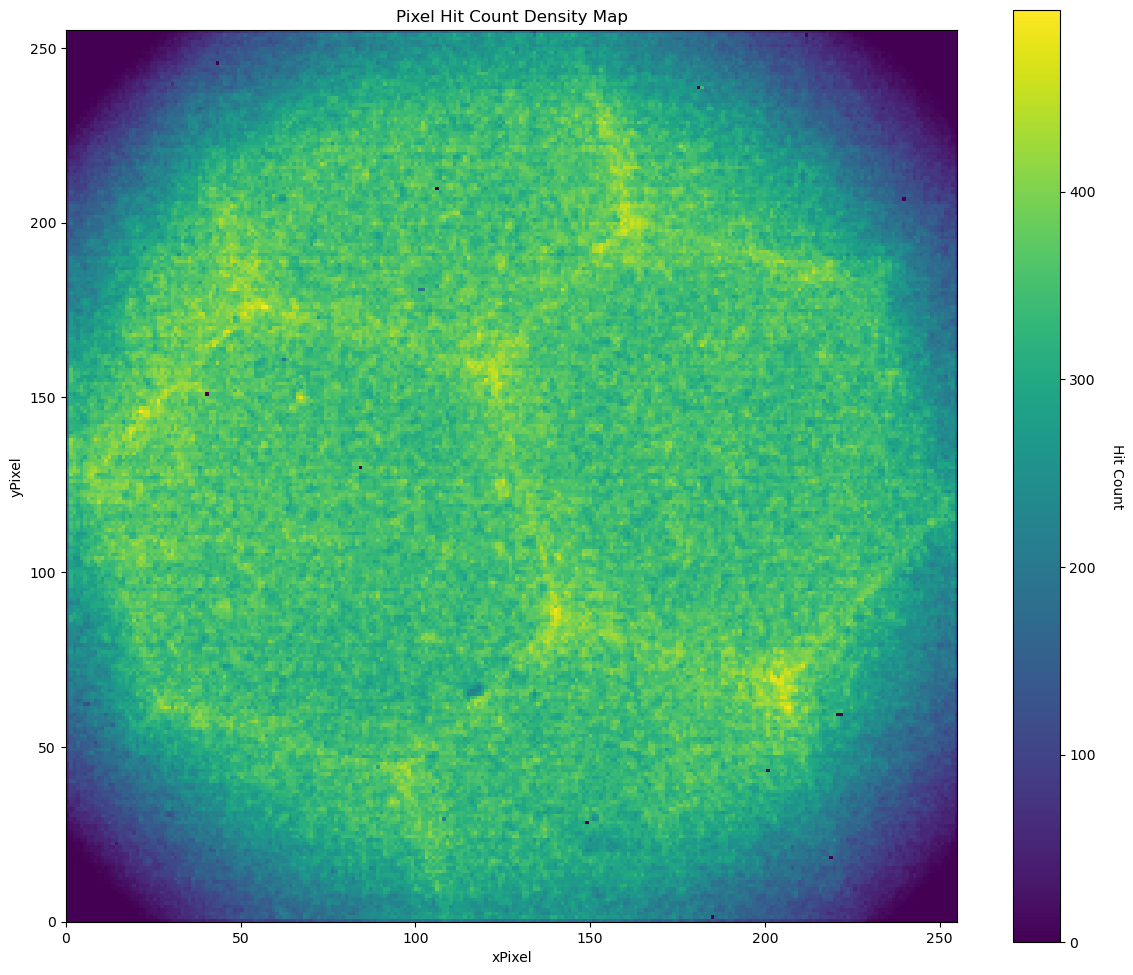

In [7]:
# Filter only 'Pixel' signal type data
pixel_df = df[df['signalTypeDescription'] == 'Pixel']

# Create a 2D histogram (image) of the pixel data
plt.figure(figsize=(12, 10))

# Create 2D histogram with color representing count density
hist, xedges, yedges = np.histogram2d(pixel_df['xPixel'], pixel_df['yPixel'], bins=256, range=[[0, 255], [0, 255]])

# Display as image
plt.imshow(hist.T, origin='lower', extent=[0, 255, 0, 255], cmap='viridis', aspect='equal')
plt.xlabel('xPixel')
plt.ylabel('yPixel')
plt.title('Pixel Hit Count Density Map')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Hit Count', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()
